In [1]:
## Import packages
import numpy as np
import pandas as pd
import copy
# from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer


import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv/train.csv')
train.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
test = pd.read_csv('test.csv/test.csv')
test.head(5)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [4]:
# np.array_equal(train.id, train.id.astype(int))

In [5]:
train.shape

(20800, 5)

In [6]:
train.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [7]:
test.shape

(5200, 4)

In [8]:
test.dtypes

id         int64
title     object
author    object
text      object
dtype: object

In [9]:
test.isna().sum().sort_values(ascending = False)

author    503
title     122
text        7
id          0
dtype: int64

In [10]:
# make a copy of the dataframe in case 
train_original = copy.deepcopy(train)

In [11]:
label_counts = train["label"].value_counts()

#see distribution of 1 and 0 labels 

In [12]:
# for i in label_counts.values:
#     print(i)

label_counts

1    10413
0    10387
Name: label, dtype: int64

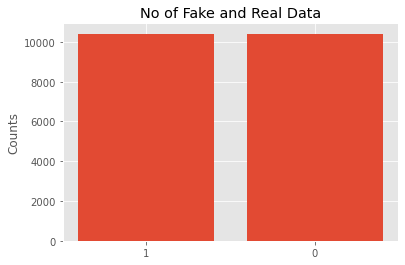

In [13]:
bar = plt.bar(label_counts.index.astype('str'), label_counts)
plt.ylabel('Counts')
plt.title('No of Fake and Real Data')


plt.show()

In [14]:
# import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
# import matplotlib.pyplot as plt

# objects = ('')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')

# plt.show()

In [15]:
train.isna().sum().sort_values(ascending = False)

author    1957
title      558
text        39
label        0
id           0
dtype: int64

# Text pre processing 

In [16]:
# basic pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

from wordcloud import WordCloud

In [17]:
def nans(train): 
    return train[train.isnull().any(axis=1)]
nans(train)

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


In [18]:
def nans(test): 
    return test[test.isnull().any(axis=1)]
nans(test)

,id,title,author,text
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?
22,20822,NaN,Dale Johnson,VERSE 9. THE STATE OF NATIONAL INSECURITY\nThe...
...,...,...,...,...
5152,25952,Flotilla of Russian warships sails into the Me...,NaN,"09:01 EST, 12 November 2016 | Updated: 18:54 E..."
5163,25963,TRUMP RECEIVED BY MASSIVE CROWD IN ALBUQUERQUE...,NaN,Home / News / TRUMP RECEIVED BY MASSIVE CROWD ...
5170,25970,Reinventing Democracy in America Starts by Vot...,NaN,Reinventing Democracy in America Starts by Vot...
5172,25972,The Postmodern Stalinism of the Western Media ...,NaN,Originally appeared at Chronicles Magazine \nI...


In [19]:
# train = train.dropna(subset=['title', 'text'])
# test = test.dropna(subset=['title', 'text'])

test=test.fillna(' ')
train=train.fillna(' ')

In [20]:

#b4 pre processing 

In [21]:
# basic pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


#remove stop words 
#lemmetization instead of stemmer 

def preprocess(review):
    review = " ".join([stemmer.stem(w.lower()) for w in word_tokenize(re.sub('[^a-zA-Z]+', ' ', review.replace("<br />", ""))) if not w in stop_words])
    return review


#cleaning all text from both test and train set 
train['text_clean'] = train.apply(lambda x: preprocess(x['text']), axis=1)
test['text_clean'] = test.apply(lambda x: preprocess(x['text']), axis=1) 

In [22]:
# plt.subplots(figsize=(25,15))
# wordcloud = WordCloud(
#                           background_color='white',
#                         max_words =20,
#                           width=1920,
#                           height=1080
#                          ).generate(" ".join(train.text))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.savefig('clean_text.png')
# plt.show()

In [23]:
# plt.subplots(figsize=(25,15))
# wordcloud = WordCloud(
#                           background_color='white',
#                         max_words =20,
#                           width=1920,
#                           height=1080
#                          ).generate(" ".join(train.title))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.savefig('clean_title.png')
# plt.show()

In [24]:
# test.head(5)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# split dataset to training and test dataset
from sklearn.feature_extraction.text import CountVectorizer #one hot 
from sklearn.model_selection import train_test_split


data_train, data_val, y_train, y_val = train_test_split(train['text_clean'], train['label'], 
                                                          test_size = 0.25, random_state = 2020, stratify = train['label'])

vectorizer = CountVectorizer()
train_counts = vectorizer.fit_transform(data_train)
val_counts = vectorizer.transform(data_val)


# vectorizer = TfidfVectorizer()
# train_vectors = vectorizer.fit_transform(train['text_clean'])
# test_counts = vectorizer.transform(test['text_clean'])

In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# from datetime import datetime

# start=datetime.now()
# lr = LogisticRegression(max_iter = 6000)

# lr.fit(train_counts, y_train)
# lr_pred = lr.predict(val_counts)
# print('Logistic Regression')
# print('Accuracy:')
# print(lr.score(val_counts, y_val))
# print('Confusion Matrix:')
# print(confusion_matrix(lr_pred, y_val))
# print('Time taken:')
# print(datetime.now()-start)

In [27]:
# tn, fp, fn, tp = confusion_matrix(lr_pred, y_val).ravel()
# cm = [[tp,fp],[fn,tn]]

In [28]:
# import seaborn as sns


# ax= plt.subplot()
# sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
# ax.set_title('Logistic Regression Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake']);

In [29]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(lr, train_counts, y_train, cv=10)
# print('Cross-Validation Accuracy Scores', scores.mean()*100.0)

In [30]:
#Prediction to test set to sent to kaggle to know test set real score 

In [31]:
# test_counts = vectorizer.transform(test['text_clean'])
# predictions_lr = lr.predict(test_counts)

# pred_lr=pd.DataFrame(predictions_lr,columns=['label'])
# pred_lr['id']=test['id']
# pred_lr.groupby('label').count()

In [32]:
#clean submit csv

In [33]:
# pred_lr.to_csv('log_reg.csv', index=False)
# log_reg = pd.read_csv('log_reg.csv')
# log_reg.isna().sum().sort_values(ascending = False)

In [34]:
# log_reg.dtypes

In [35]:
# log_reg['id'] = log_reg['id'].astype("int32")

In [36]:
# log_reg.dtypes

In [37]:
# log_reg.shape

In [38]:
# log_reg.to_csv('log_reg.csv', index=False)

# SVM 

In [39]:
# from sklearn.svm import LinearSVC

# start=datetime.now()
# svm = LinearSVC(max_iter = 20000)

# svm.fit(train_counts, y_train)
# svm_pred = svm.predict(val_counts)
# print('SVM')
# print('Accuracy:')
# print(svm.score(val_counts, y_val))
# print('Confusion Matrix:')
# print(confusion_matrix(svm_pred, y_val))
# print('Time taken:')
# print(datetime.now()-start)

In [40]:
# SVM_score = cross_val_score(svm, train_counts, y_train, cv=10)
# print('Cross-Validation Accuracy Scores', SVM_score.mean()*100.0)

In [41]:
# tn1, fp1, fn1, tp1 = confusion_matrix(svm_pred, y_val).ravel()
# cm_svm = [[tp1,fp1],[fn1,tn1]]

# ax_svm = plt.subplot()
# sns.heatmap(cm_svm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# # labels, title and ticks
# ax_svm.set_xlabel('ACTUAL LABELS');ax_svm.set_ylabel('PREDICTED LABELS'); 
# ax_svm.set_title('SVM Confusion Matrix'); 
# ax_svm.xaxis.set_ticklabels(['Real', 'Fake']); ax_svm.yaxis.set_ticklabels(['Real', 'Fake']);

In [42]:
# # Test on test set 

# predictions_svm = svm.predict(test_counts)

# pred_svm=pd.DataFrame(predictions_svm,columns=['label'])
# pred_svm['id']=test['id']
# pred_svm.groupby('label').count()

In [43]:
# pred_svm.to_csv('svm.csv', index=False)
# svm_csv = pd.read_csv('svm.csv')
# svm_csv .isna().sum().sort_values(ascending = False)
# svm_csv ['id'] = svm_csv ['id'].astype("int32")

In [44]:
# svm_csv.to_csv('svm.csv', index=False)

# Naive Bayes 

In [45]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import confusion_matrix

# start=datetime.now()
# nb = MultinomialNB()

# nb.fit(train_counts, y_train)
# nb_pred = nb.predict(val_counts)
# print('Naive Bayes')
# print('Accuracy:')
# print(nb.score(val_counts, y_val))
# print('Confusion Matrix:')
# print(confusion_matrix(nb_pred, y_val))
# print('Time taken:')
# print(datetime.now()-start)

In [46]:
# nb_score = cross_val_score(nb, train_counts, y_train, cv=10)
# print('Cross-Validation Accuracy Scores', nb_score.mean()*100.0)

In [47]:
# tn2, fp2, fn2, tp2 = confusion_matrix(nb_pred, y_val).ravel()
# cm_nb = [[tp2,fp2],[fn2,tn2]]

# ax_nb= plt.subplot()
# sns.heatmap(cm_nb, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# # labels, title and ticks
# ax_nb.set_xlabel('ACTUAL LABELS');ax_nb.set_ylabel('PREDICTED LABELS'); 
# ax_nb.set_title('NB Confusion Matrix'); 
# ax_nb.xaxis.set_ticklabels(['Real', 'Fake']); ax_nb.yaxis.set_ticklabels(['Real', 'Fake']);

In [48]:
# # Test on test set 

# predictions_nb = nb.predict(test_counts)

# pred_nb=pd.DataFrame(predictions_nb,columns=['label'])
# pred_nb['id']=test['id']
# pred_nb.groupby('label').count()

In [49]:
# pred_nb.to_csv('nb.csv', index=False)
# nb_csv = pd.read_csv('nb.csv')
# nb_csv.isna().sum().sort_values(ascending = False)
# nb_csv['id'] = nb_csv['id'].astype("int32")

In [50]:
# nb_csv.to_csv('nb.csv', index=False)

# Topic modeliing 

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
data_train_topic = data_train

In [53]:
data_train_topic.shape

(15600,)

In [54]:
data_train_topic.values.tolist()

['rememb blind bulgarian mystic predict rise isi well got bad news dare i say command chief donald trump via usualroutin baba vanga known follow nostradamu balkan claim obama last presid unit state america vanga allegedli call elect barack obama well predict th presid unit state would african american also make chill claim would last u s presid usual i happi dismiss reaction vanga prophet predict public cling onto ray hope today new polit climat actual blind mystic pretti great track record vision the prophetess die age alleg made hundr predict futur per cent accuraci rate home petrich bulgaria these predict includ climat chang melt polar ice cap allegedli foresaw back say cold region becom warm volcano awaken vanga follow also say predict box day tsunami warn huge wave would descend big coast cover peopl town caus everyth disappear water back warn american brethren attack two steel bird possibl refer twin tower attack she also warn group muslim extremist would invad europ forese great

In [55]:
    # data_train_topic.values

In [56]:

# conda install -c spacy spacy

In [57]:
# python -m spacy download en_core_web_sm --> in cmd 

In [ ]:
import spacy

sp = spacy.load('en_core_web_sm')
# sp.max_length = 50000000
sp_text = sp('\n'.join(data_train_topic.values).lower())
sp_words = [word.text for word in sp_text if word.is_alpha and not word.is_stop]
sp_vectors = [word.vector for word in sp_text if word.is_alpha and not word.is_stop]